In [1]:
import duckdb
import pandas as pd
import matplotlib.pyplot as plt

# Plotting type of Bikes

In [71]:
DATA_PATH = "../data/processed/citibike/*/*/data.parquet"

query = f"""
SELECT
    rideable_type,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
GROUP BY rideable_type
ORDER BY n_rides DESC
"""

df_bike_type = duckdb.query(query).df()
df_bike_type


,rideable_type,n_rides
0,electric_bike,74796697
1,classic_bike,44442489


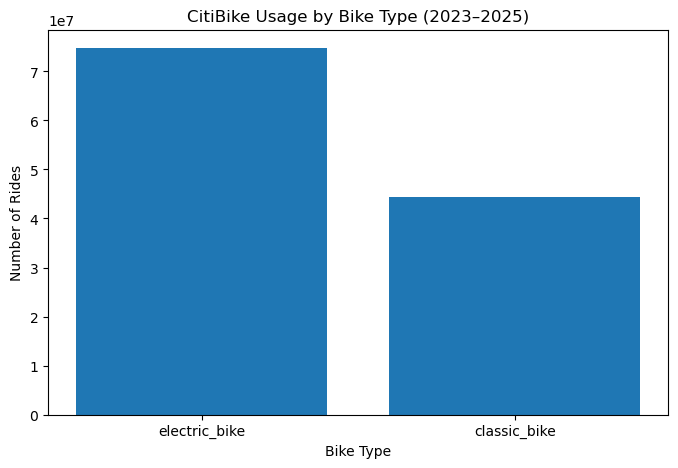

In [72]:
plt.figure(figsize=(8,5))
plt.bar(df_bike_type['rideable_type'], df_bike_type['n_rides'])
plt.title("CitiBike Usage by Bike Type (2023–2025)")
plt.ylabel("Number of Rides")
plt.xlabel("Bike Type")
plt.show()


## Usage by membership

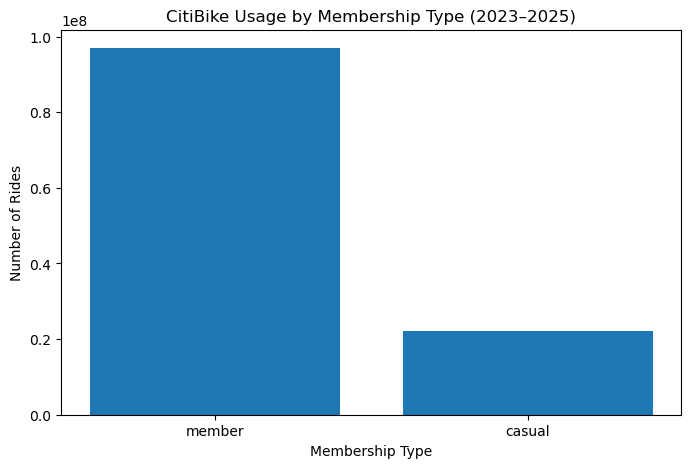

In [73]:
query = f"""
SELECT
    member_casual,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
GROUP BY member_casual
ORDER BY n_rides DESC
"""

df_bike_type = duckdb.query(query).df()
df_bike_type

plt.figure(figsize=(8,5))
plt.bar(df_bike_type['member_casual'], df_bike_type['n_rides'])
plt.title("CitiBike Usage by Membership Type (2023–2025)")
plt.ylabel("Number of Rides")
plt.xlabel("Membership Type")
plt.show()

## Usage by weekday

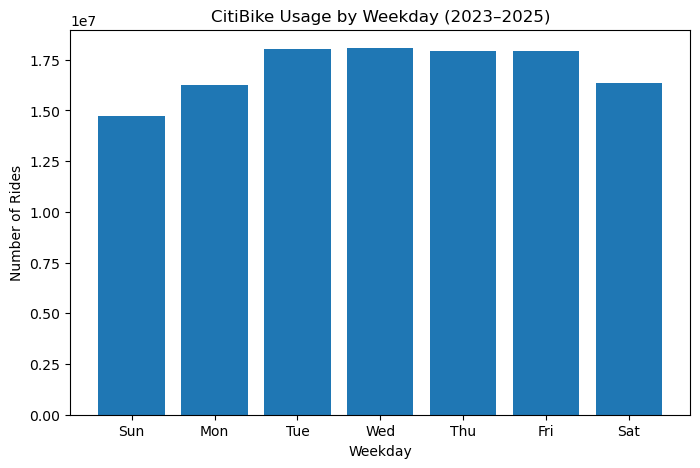

In [76]:
DATA_PATH = "../data/processed/citibike/*/*/data.parquet"

query = f"""
SELECT
    EXTRACT(dow FROM started_at) AS weekday,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
GROUP BY weekday
ORDER BY weekday
"""

df_weekday = duckdb.query(query).df()

weekday_names = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
df_weekday["weekday_name"] = df_weekday["weekday"].astype(int).apply(lambda x: weekday_names[x])

plt.figure(figsize=(8,5))
plt.bar(df_weekday['weekday_name'], df_weekday['n_rides'])
plt.title("CitiBike Usage by Weekday (2023–2025)")
plt.ylabel("Number of Rides")
plt.xlabel("Weekday")
plt.show()


## Usage by hour of day

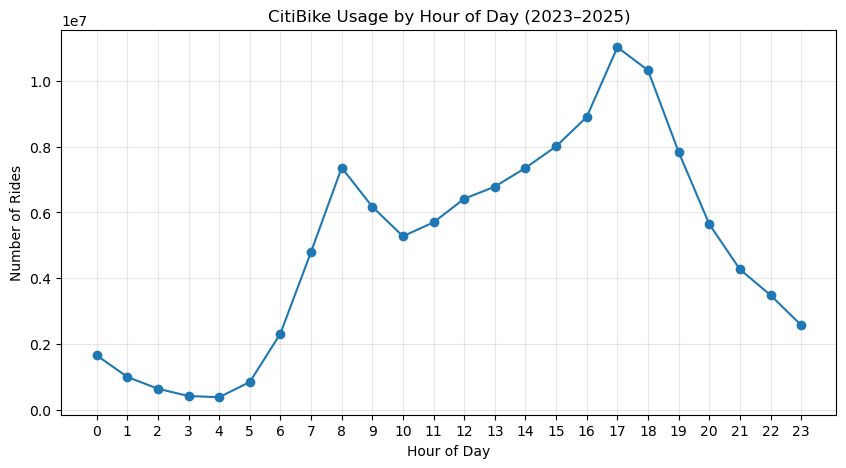

In [77]:
query = f"""
SELECT
    EXTRACT(hour FROM started_at) AS hour,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
GROUP BY hour
ORDER BY hour
"""

df_hour = duckdb.query(query).df()

plt.figure(figsize=(10,5))
plt.plot(df_hour['hour'], df_hour['n_rides'], marker='o')
plt.title("CitiBike Usage by Hour of Day (2023–2025)")
plt.ylabel("Number of Rides")
plt.xlabel("Hour of Day")
plt.xticks(range(0, 24))
plt.grid(alpha=0.3)
plt.show()


## Usage over time (monthly)

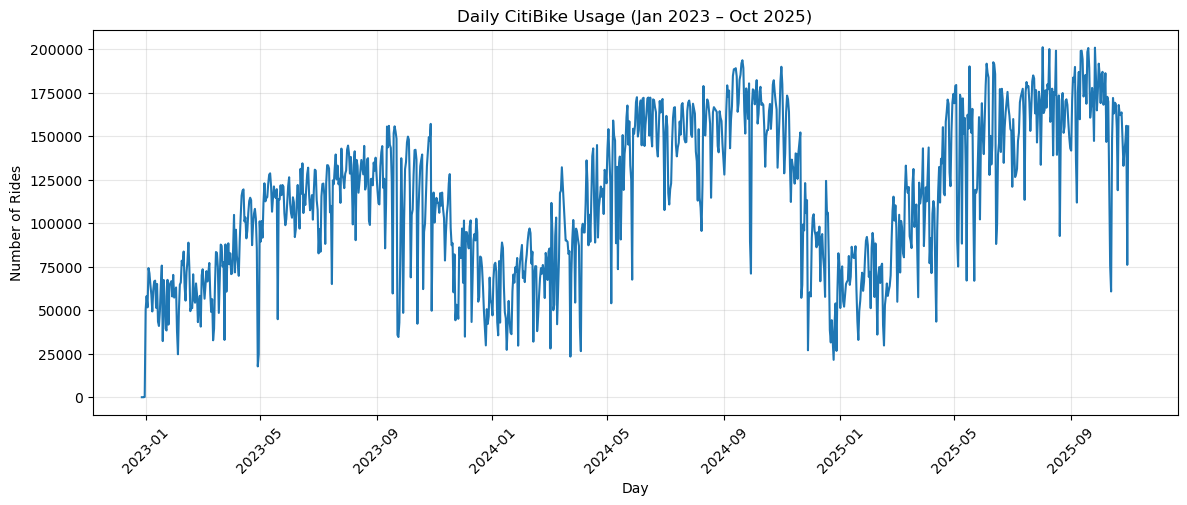

In [78]:
query = f"""
SELECT
    date_trunc('day', started_at) AS day,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
GROUP BY day
ORDER BY day
"""

df_day = duckdb.query(query).df()

plt.figure(figsize=(14,5))
plt.plot(df_day['day'], df_day['n_rides'])
plt.title("Daily CitiBike Usage (Jan 2023 – Oct 2025)")
plt.ylabel("Number of Rides")
plt.xlabel("Day")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()


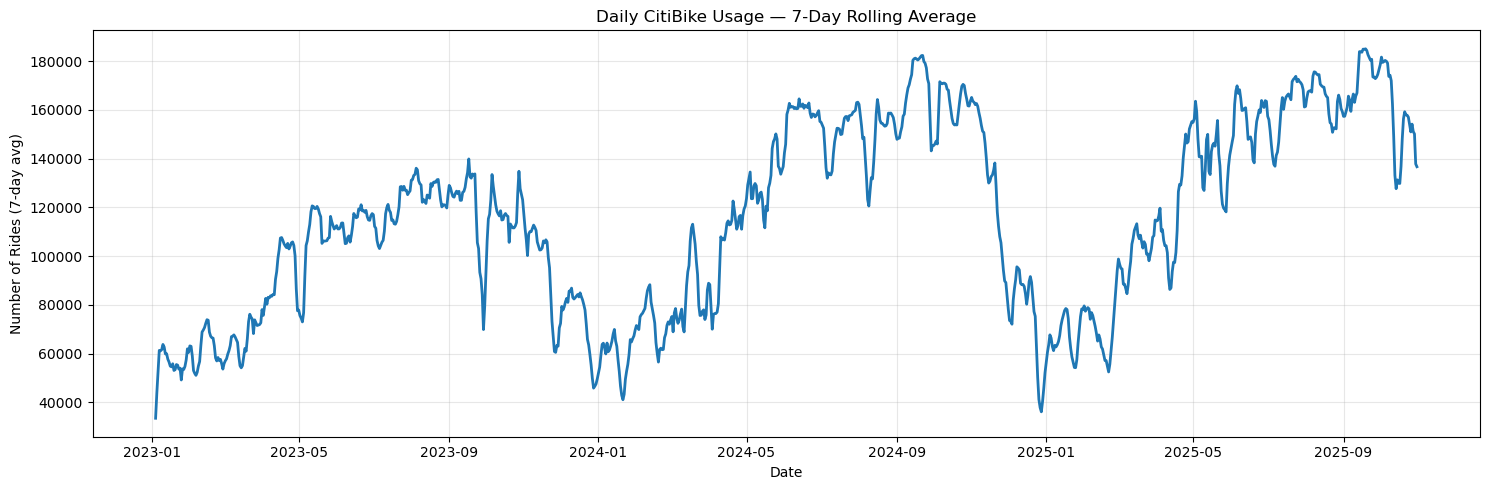

In [79]:
df_day["rolling_7"] = df_day["n_rides"].rolling(7).mean()

plt.figure(figsize=(15,5))
plt.plot(df_day["day"], df_day["rolling_7"], linewidth=2, color="tab:blue")
plt.title("Daily CitiBike Usage — 7-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Number of Rides (7-day avg)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


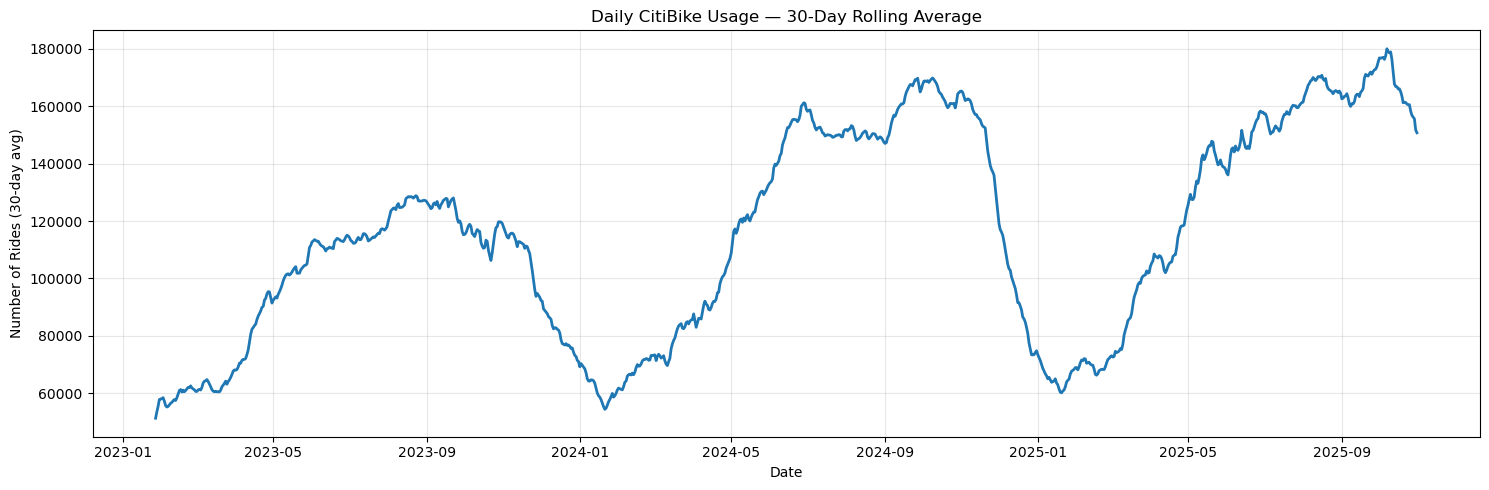

In [80]:
df_day["rolling_30"] = df_day["n_rides"].rolling(30).mean()

plt.figure(figsize=(15,5))
plt.plot(df_day["day"], df_day["rolling_30"], linewidth=2, color="tab:blue")
plt.title("Daily CitiBike Usage — 30-Day Rolling Average")
plt.xlabel("Date")
plt.ylabel("Number of Rides (30-day avg)")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

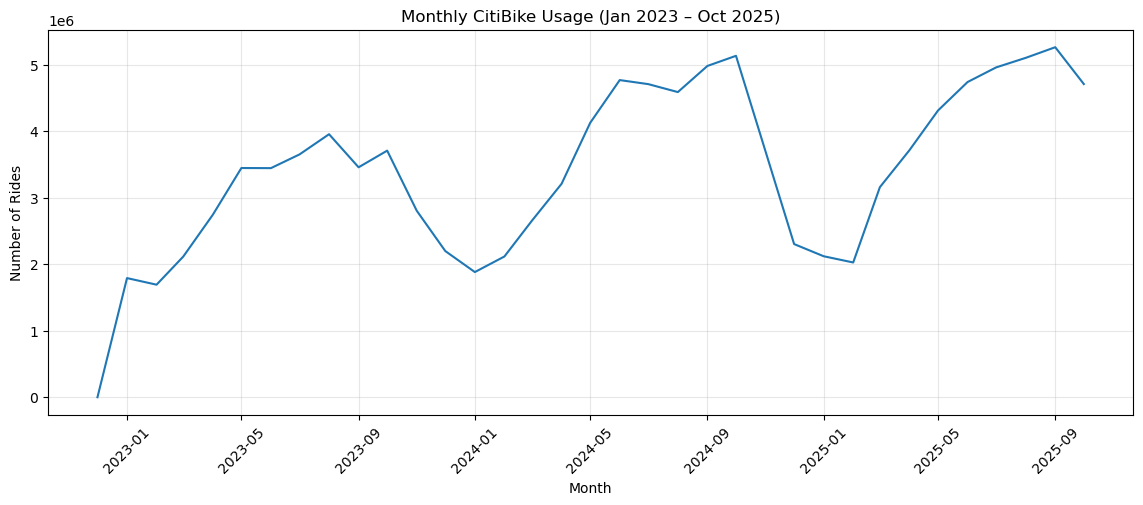

In [81]:
query = f"""
SELECT
    date_trunc('month', started_at) AS month,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
GROUP BY month
ORDER BY month
"""

df_month = duckdb.query(query).df()

plt.figure(figsize=(14,5))
plt.plot(df_month['month'], df_month['n_rides'])
plt.title("Monthly CitiBike Usage (Jan 2023 – Oct 2025)")
plt.ylabel("Number of Rides")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

## Separate plots by year

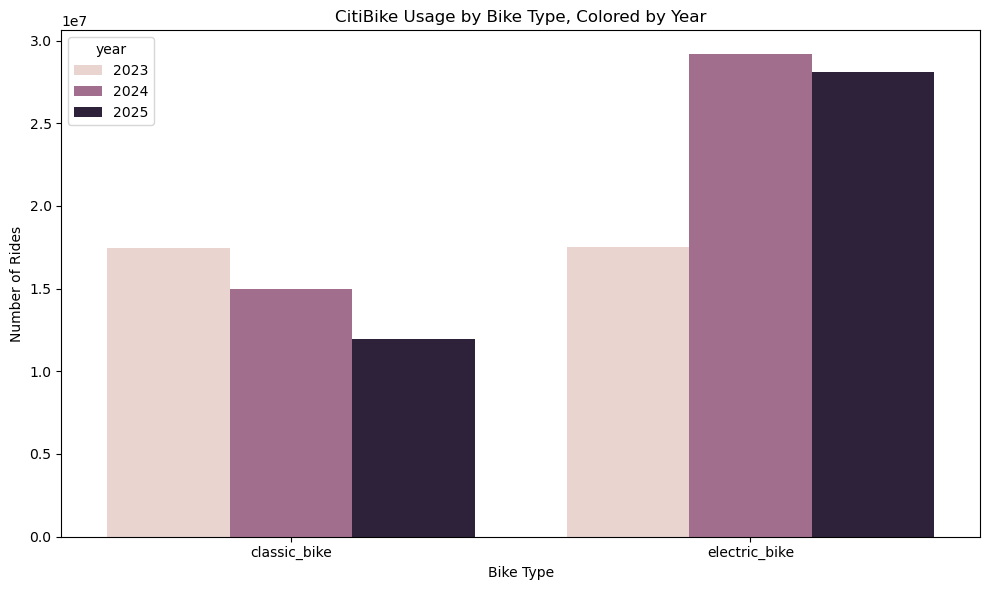

In [83]:
query = f"""
SELECT
    EXTRACT(year FROM started_at) AS year,
    rideable_type,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
GROUP BY year, rideable_type
ORDER BY year, rideable_type
"""
df = duckdb.query(query).df()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.barplot(
    data=df,
    x="rideable_type",
    y="n_rides",
    hue="year"
)
plt.title("CitiBike Usage by Bike Type, Colored by Year")
plt.ylabel("Number of Rides")
plt.xlabel("Bike Type")
plt.tight_layout()
plt.show()

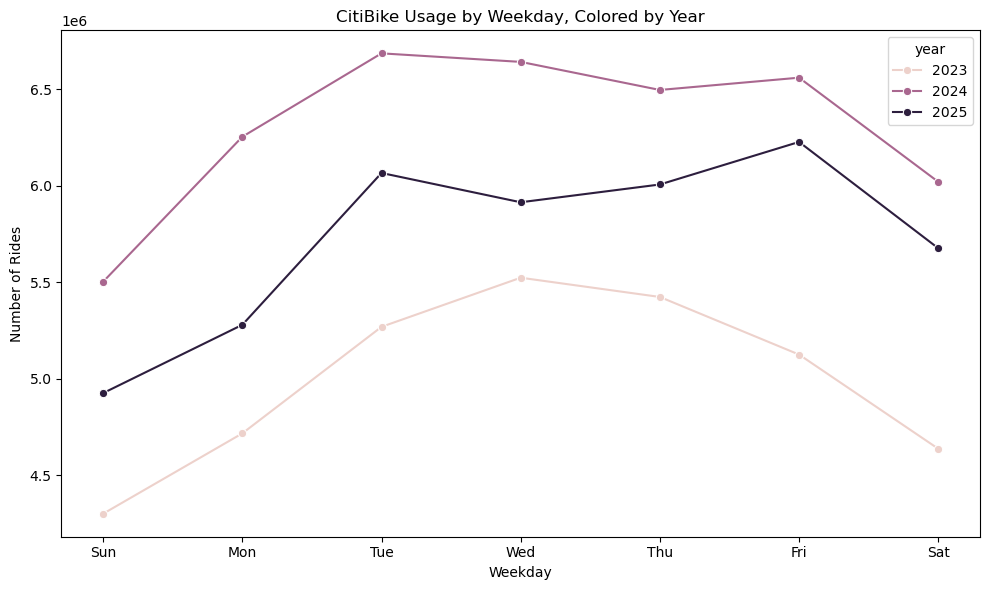

In [84]:
query = f"""
SELECT
    EXTRACT(year FROM started_at) AS year,
    EXTRACT(dow FROM started_at) AS weekday,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
GROUP BY year, weekday
ORDER BY year, weekday
"""
df = duckdb.query(query).df()

weekday_names = ["Sun", "Mon", "Tue", "Wed", "Thu", "Fri", "Sat"]
df["weekday_name"] = df["weekday"].astype(int).map(lambda x: weekday_names[x])

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df,
    x="weekday_name",
    y="n_rides",
    hue="year",
    marker="o"
)
plt.title("CitiBike Usage by Weekday, Colored by Year")
plt.ylabel("Number of Rides")
plt.xlabel("Weekday")
plt.tight_layout()
plt.show()

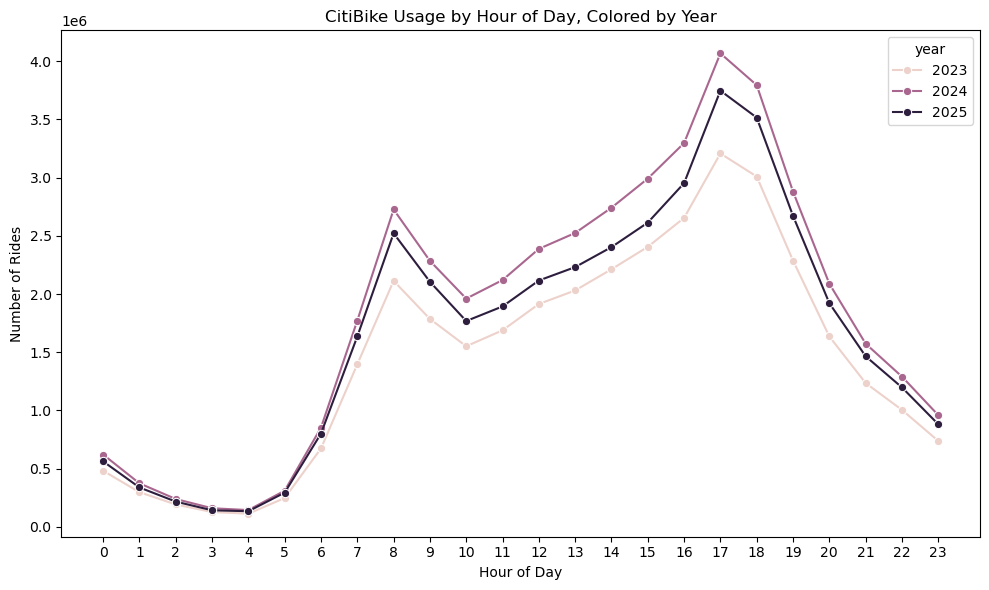

In [40]:
query = f"""
SELECT
    EXTRACT(year FROM started_at) AS year,
    EXTRACT(hour FROM started_at) AS hour,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
GROUP BY year, hour
ORDER BY year, hour
"""
df = duckdb.query(query).df()

plt.figure(figsize=(10,6))
sns.lineplot(
    data=df,
    x="hour",
    y="n_rides",
    hue="year",
    marker="o"
)
plt.title("CitiBike Usage by Hour of Day, Colored by Year")
plt.ylabel("Number of Rides")
plt.xlabel("Hour of Day")
plt.xticks(range(24))
plt.tight_layout()
plt.show()

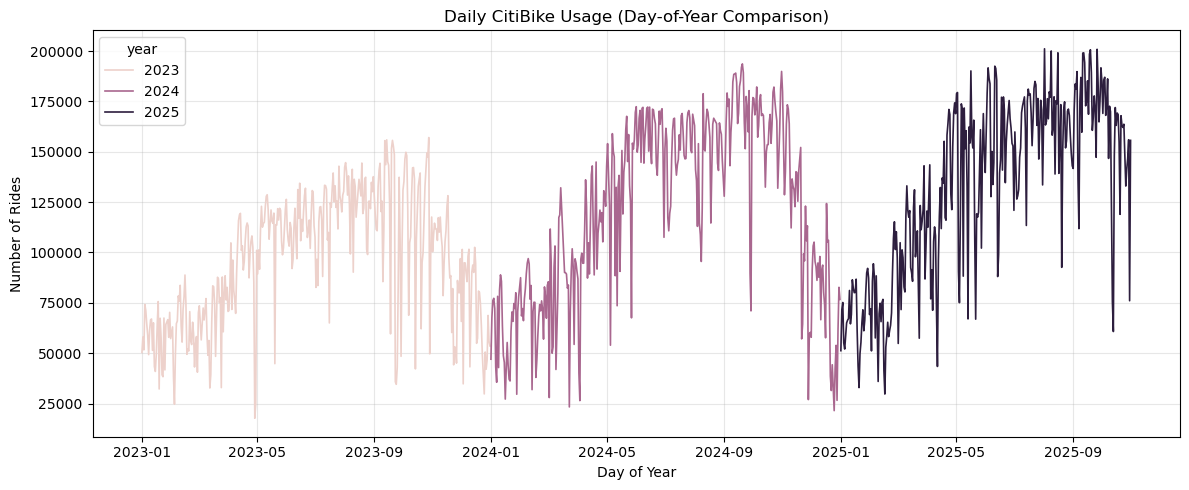

In [85]:
query = f"""
SELECT
    EXTRACT(year FROM started_at) AS year,
    date_trunc('day', started_at) AS day,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
GROUP BY year, day
ORDER BY day
"""
df_day = duckdb.query(query).df()

plt.figure(figsize=(12,5))
sns.lineplot(data=df_day, x="day", y="n_rides", hue="year", linewidth=1.2)
plt.title("Daily CitiBike Usage (Day-of-Year Comparison)")
plt.xlabel("Day of Year")
plt.ylabel("Number of Rides")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

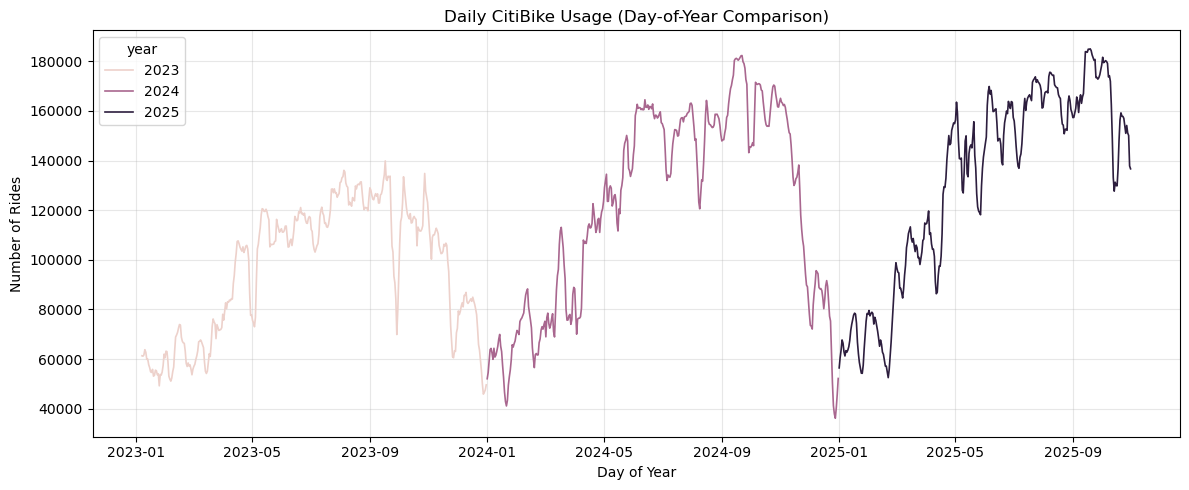

In [ ]:
df_day["rolling_7"] = df_day["n_rides"].rolling(7).mean()

plt.figure(figsize=(12,5))
sns.lineplot(data=df_day, x="day", y="rolling_7", hue="year", linewidth=1.2)
plt.title("Daily CitiBike Usage (Day-of-Year Comparison)")
plt.xlabel("Day of Year")
plt.ylabel("Number of Rides")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

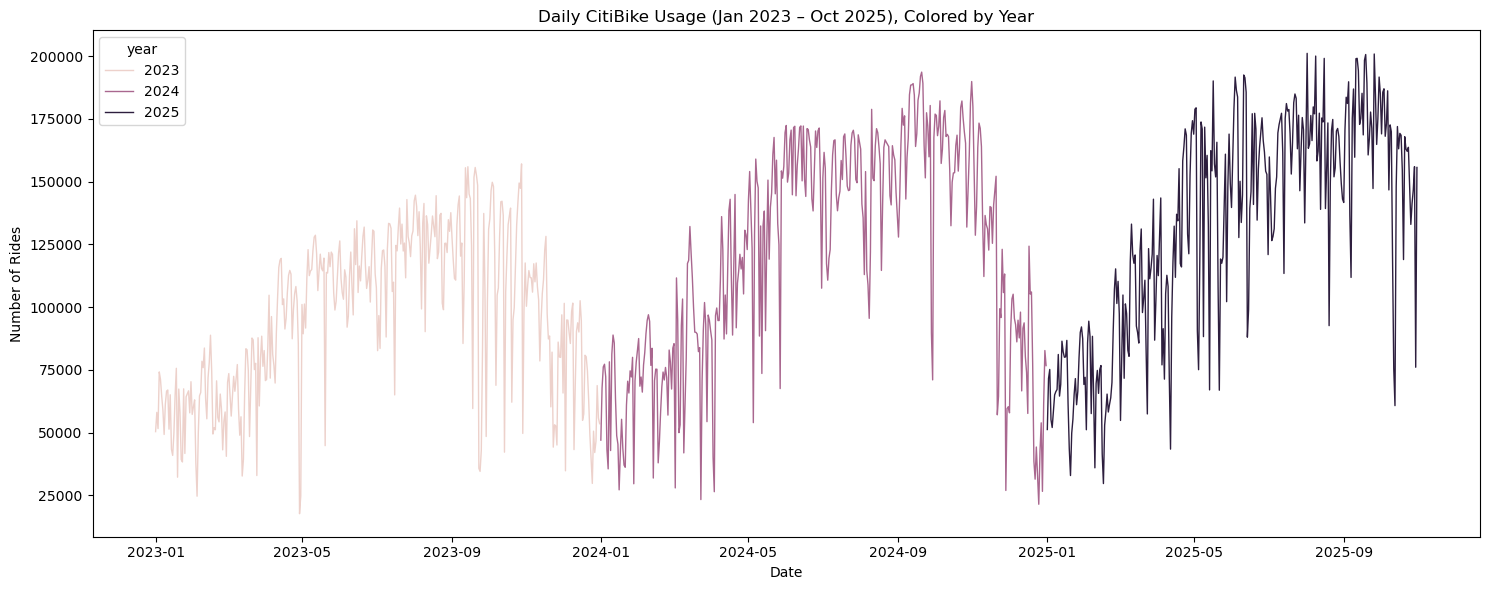

In [88]:
plt.figure(figsize=(15,6))
sns.lineplot(
    data=df_day,
    x="day",
    y="n_rides",
    hue="year",
    linewidth=1
)
plt.title("Daily CitiBike Usage (Jan 2023 – Oct 2025), Colored by Year")
plt.ylabel("Number of Rides")
plt.xlabel("Date")
plt.tight_layout()
plt.show()

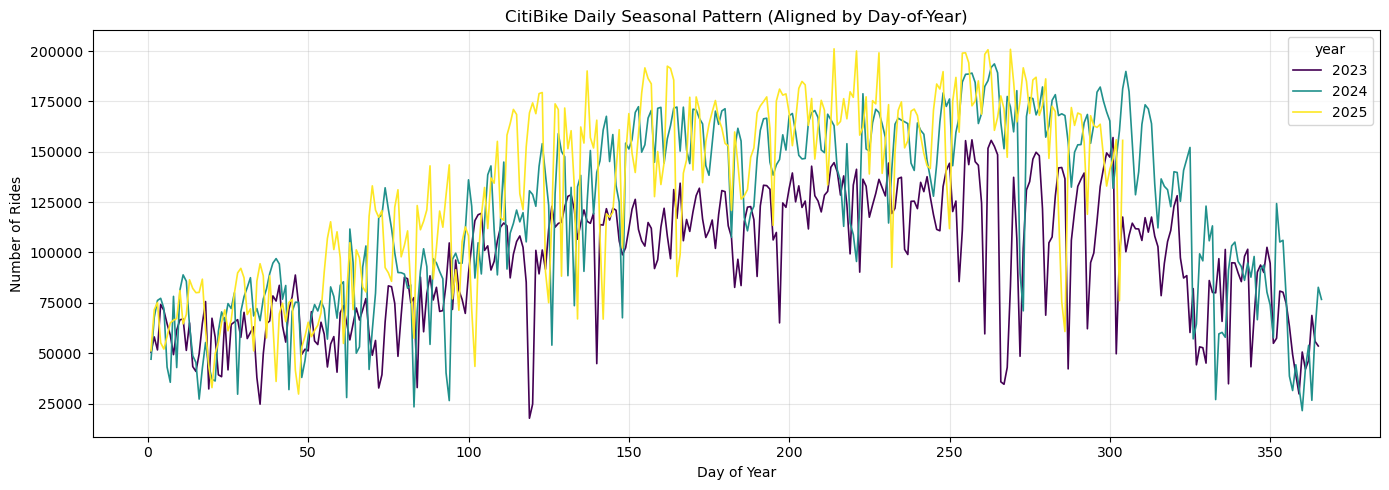

In [89]:
query = f"""
SELECT
    EXTRACT(year FROM started_at) AS year,
    EXTRACT(doy FROM started_at) AS doy,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
GROUP BY year, doy
ORDER BY year, doy
"""

df_doy = duckdb.query(query).df()

plt.figure(figsize=(14,5))
sns.lineplot(
    data=df_doy,
    x="doy",
    y="n_rides",
    hue="year",
    palette="viridis",
    linewidth=1.2
)
plt.title("CitiBike Daily Seasonal Pattern (Aligned by Day-of-Year)")
plt.xlabel("Day of Year")
plt.ylabel("Number of Rides")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

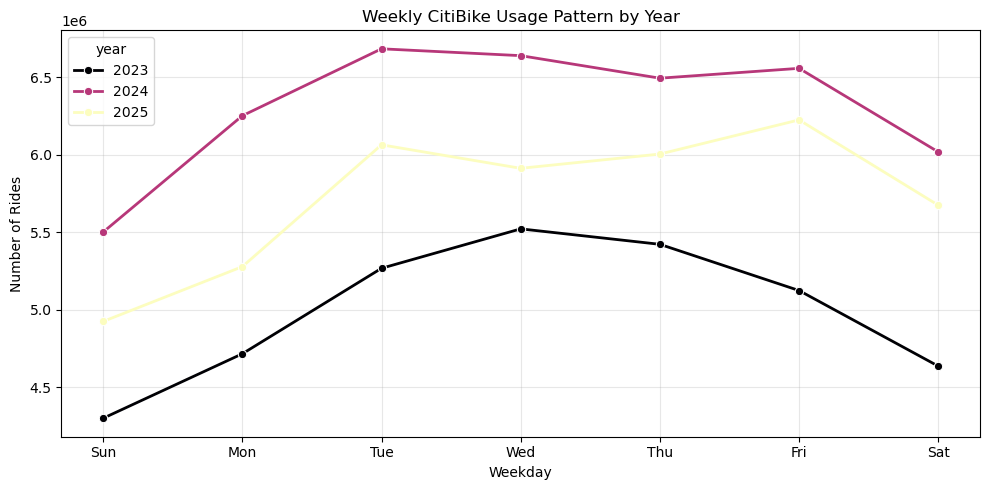

In [90]:
query = f"""
SELECT
    EXTRACT(year FROM started_at) AS year,
    EXTRACT(dow FROM started_at) AS weekday,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
GROUP BY year, weekday
ORDER BY weekday, year
"""
df_weekday = duckdb.query(query).df()

weekday_names = ["Sun","Mon","Tue","Wed","Thu","Fri","Sat"]
df_weekday["weekday_name"] = df_weekday["weekday"].astype(int).map(lambda x: weekday_names[x])

plt.figure(figsize=(10,5))
sns.lineplot(
    data=df_weekday,
    x="weekday_name",
    y="n_rides",
    hue="year",
    marker="o",
    linewidth=2,
    palette="magma"
)
plt.title("Weekly CitiBike Usage Pattern by Year")
plt.xlabel("Weekday")
plt.ylabel("Number of Rides")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Trip duration

In [7]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../data/processed/citibike/*/*/data.parquet"

query = f"""
WITH trips AS (
    SELECT
        EXTRACT(year FROM started_at) AS year,
        datediff('minute', started_at, ended_at) AS duration_min
    FROM read_parquet('{DATA_PATH}')
    WHERE ended_at IS NOT NULL
      AND started_at IS NOT NULL
      AND ended_at > started_at
      AND datediff('minute', started_at, ended_at) BETWEEN 0 AND 120
      AND started_at >= '2023-01-01'
)
SELECT
    year,
    CAST(duration_min AS INT) + 1 AS bucket,
    COUNT(*) AS n
FROM trips
GROUP BY year, bucket
ORDER BY year, bucket
"""

df_hist = duckdb.sql(query).df()



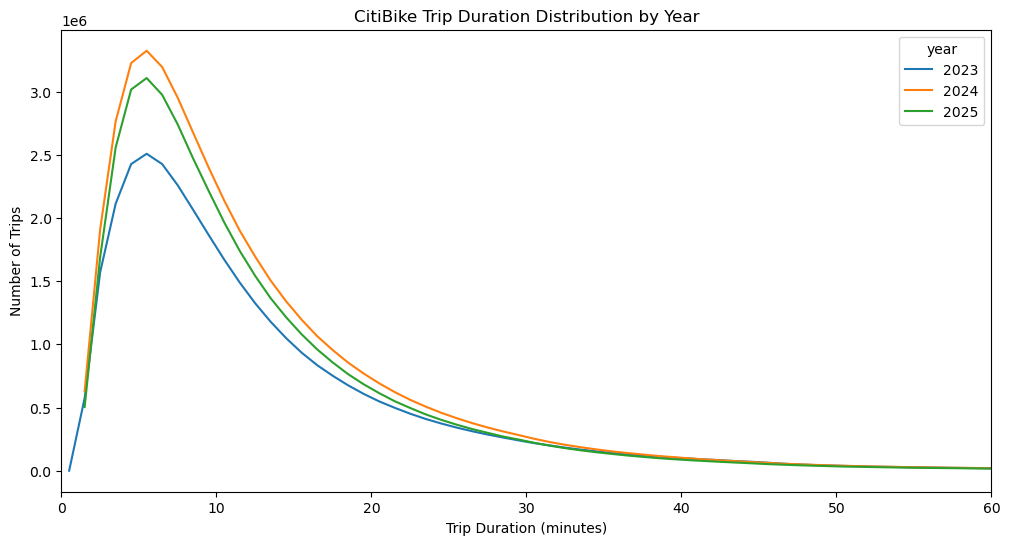

In [8]:
df_hist["duration_mid"] = df_hist["bucket"] - 0.5

plt.figure(figsize=(12,6))

sns.lineplot(
    data=df_hist,
    x="duration_mid",
    y="n",
    hue="year",
    palette="tab10"
)

plt.title("CitiBike Trip Duration Distribution by Year")
plt.xlabel("Trip Duration (minutes)")
plt.ylabel("Number of Trips")
plt.xlim(0, 60)
plt.show()


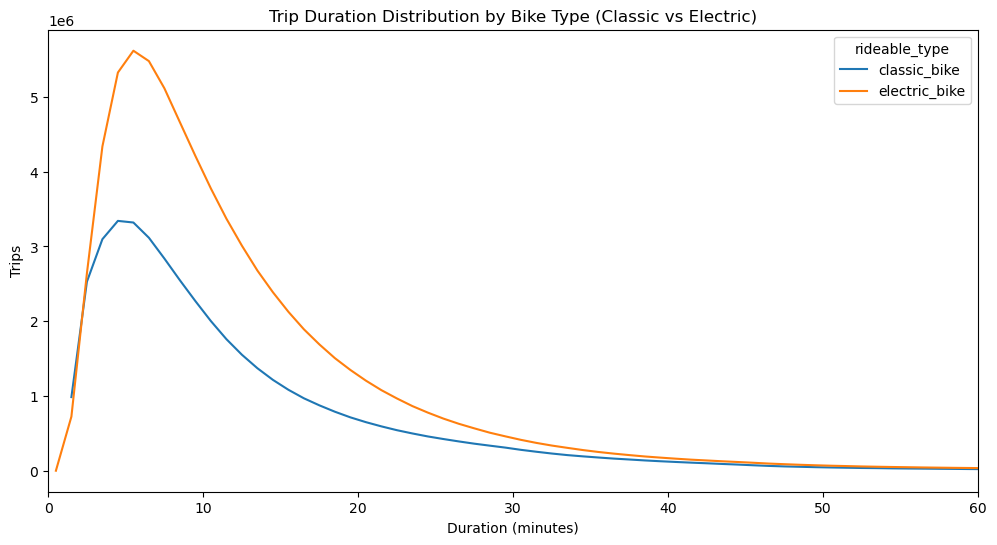

In [9]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../data/processed/citibike/*/*/data.parquet"

query = f"""
WITH trips AS (
    SELECT
        rideable_type,
        datediff('minute', started_at, ended_at) AS duration_min
    FROM read_parquet('{DATA_PATH}')
    WHERE ended_at IS NOT NULL
      AND started_at IS NOT NULL
      AND ended_at > started_at
      AND datediff('minute', started_at, ended_at) BETWEEN 0 AND 120
)
SELECT
    rideable_type,
    CAST(duration_min AS INT) + 1 AS bucket,
    COUNT(*) AS n
FROM trips
GROUP BY rideable_type, bucket
ORDER BY rideable_type, bucket
"""

df_bike = duckdb.sql(query).df()

df_bike["duration_mid"] = df_bike["bucket"] - 0.5

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_bike,
    x="duration_mid",
    y="n",
    hue="rideable_type",
    palette="tab10"
)
plt.title("Trip Duration Distribution by Bike Type (Classic vs Electric)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Trips")
plt.xlim(0,60)
plt.show()

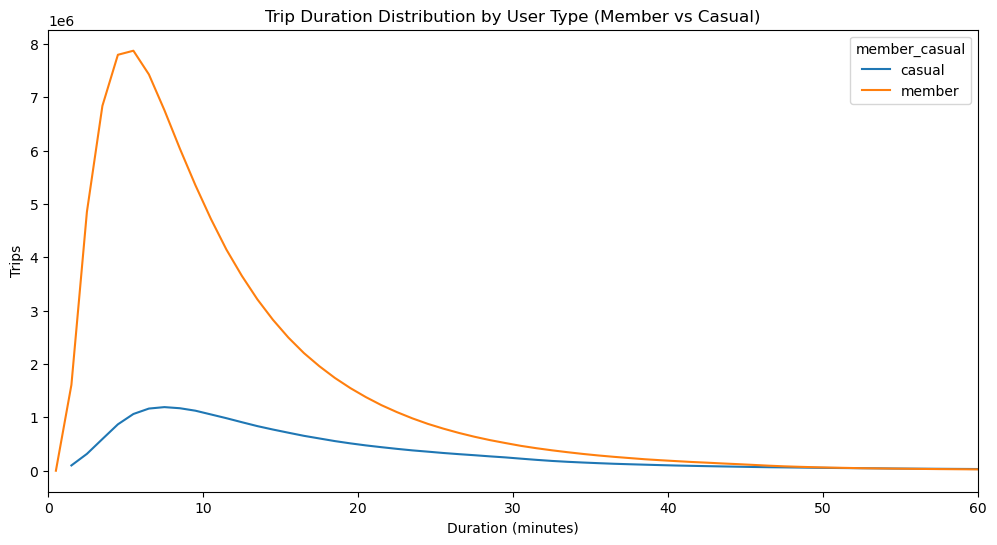

In [10]:
query = f"""
WITH trips AS (
    SELECT
        member_casual,
        datediff('minute', started_at, ended_at) AS duration_min
    FROM read_parquet('{DATA_PATH}')
    WHERE ended_at IS NOT NULL
      AND started_at IS NOT NULL
      AND ended_at > started_at
      AND datediff('minute', started_at, ended_at) BETWEEN 0 AND 120
)
SELECT
    member_casual,
    CAST(duration_min AS INT) + 1 AS bucket,
    COUNT(*) AS n
FROM trips
GROUP BY member_casual, bucket
ORDER BY member_casual, bucket
"""

df_user = duckdb.sql(query).df()

df_user["duration_mid"] = df_user["bucket"] - 0.5

plt.figure(figsize=(12,6))
sns.lineplot(
    data=df_user,
    x="duration_mid",
    y="n",
    hue="member_casual",
    palette="tab10"
)
plt.title("Trip Duration Distribution by User Type (Member vs Casual)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Trips")
plt.xlim(0,60)
plt.show()

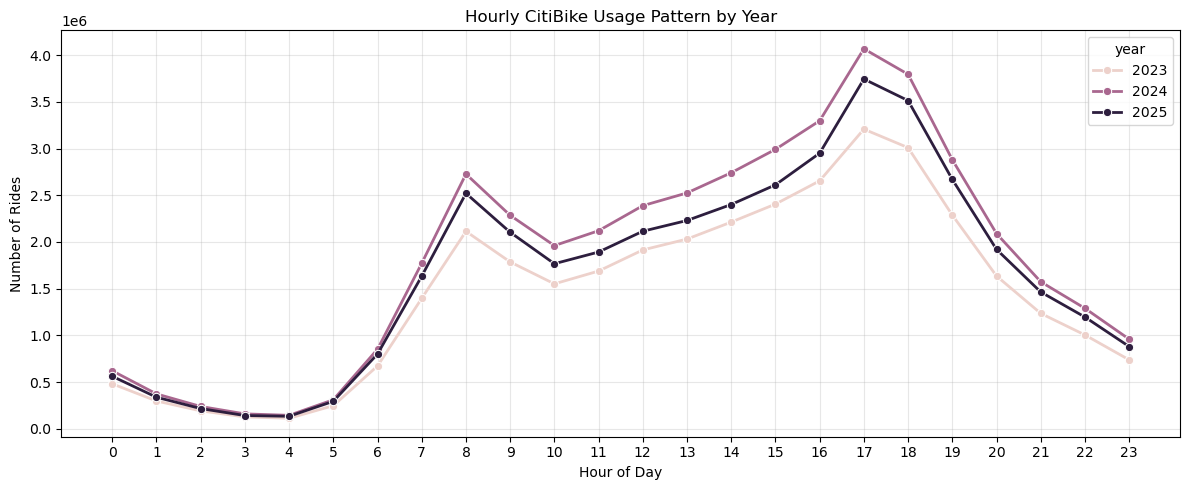

In [92]:
query = f"""
SELECT
    EXTRACT(year FROM started_at) AS year,
    EXTRACT(hour FROM started_at) AS hour,
    COUNT(*) AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
GROUP BY year, hour
ORDER BY hour, year
"""
df_hour = duckdb.query(query).df()

plt.figure(figsize=(12,5))
sns.lineplot(
    data=df_hour,
    x="hour",
    y="n_rides",
    hue="year",
    marker="o",
    linewidth=2,
   # palette="cubehelix"
)
plt.title("Hourly CitiBike Usage Pattern by Year")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Rides")
plt.xticks(range(0,24))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


In [93]:
import duckdb
import pandas as pd

DATA_PATH = "../data/processed/citibike/*/*/data.parquet"

# Overall station usage (2023+ only)
query_overall = f"""
SELECT
    start_station_name,
    AVG(start_lat) AS lat,
    AVG(start_lng) AS lng,
    COUNT(*)        AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
  AND start_station_name <> 'Unknown'
GROUP BY start_station_name
HAVING COUNT(*) > 0
"""

df_station = duckdb.sql(query_overall).df()

# Per-year station usage
query_year = f"""
SELECT
    EXTRACT(year FROM started_at) AS year,
    start_station_name,
    AVG(start_lat) AS lat,
    AVG(start_lng) AS lng,
    COUNT(*)        AS n_rides
FROM read_parquet('{DATA_PATH}')
WHERE started_at >= '2023-01-01'
  AND start_station_name <> 'Unknown'
GROUP BY year, start_station_name
HAVING COUNT(*) > 0
"""

df_station_year = duckdb.sql(query_year).df()

df_station.head(), df_station_year.head()


(           start_station_name        lat        lng  n_rides
 0     Lexington Ave & E 29 St  40.743116 -73.982154   128571
 1       Greene St & Prince St  40.725117 -73.999305   112861
 2          Broadway & W 29 St  40.746201 -73.988557   243409
 3  Brooklyn Ave & Prospect Pl  40.674120 -73.944470    32396
 4         39 St & Queens Blvd  40.744310 -73.926010    19845,
    year         start_station_name        lat        lng  n_rides
 0  2023   Garrison Ave & Manida St  40.818743 -73.890247     1770
 1  2023         Broadway & W 36 St  40.750977 -73.987654    38084
 2  2023       Peck Slip & South St  40.707519 -74.001081    33242
 3  2023         E 10 St & Avenue A  40.727408 -73.981420    46167
 4  2023  Prospect Park West & 8 St  40.665147 -73.976376    28906)

In [94]:
import folium
from folium.plugins import HeatMap
import numpy as np

# Basic center of map = mean of station coordinates
center_lat = df_station["lat"].mean()
center_lng = df_station["lng"].mean()

m_all = folium.Map(
    location=[center_lat, center_lng],
    zoom_start=12,
    tiles="CartoDB positron"
)

# Use log-weight so very busy stations don't dominate everything
df_station["weight"] = np.log1p(df_station["n_rides"])

heat_data = df_station[["lat", "lng", "weight"]].values.tolist()

HeatMap(
    heat_data,
    radius=12,
    blur=18,
    max_zoom=13
).add_to(m_all)

m_all  # in Jupyter this will display the interactive map

m_all.save("citibike_heatmap.html")


In [95]:
import duckdb

DATA_PATH = "../data/processed/citibike/*/*/data.parquet"

duckdb.sql(f"""
SELECT
    COUNT(*) AS total_trips,
    COUNT(*) FILTER (WHERE start_lng < -74.05) AS probably_jersey_trips
FROM read_parquet('{DATA_PATH}')
""").df()

,total_trips,probably_jersey_trips
0,119239186,0


In [97]:
m_years = folium.Map(
    location=[center_lat, center_lng],
    zoom_start=12,
    tiles="CartoDB positron"
)

for year in sorted(df_station_year["year"].unique()):
    df_y = df_station_year[df_station_year["year"] == year].copy()
    df_y["weight"] = np.log1p(df_y["n_rides"])

    heat_data_y = df_y[["lat", "lng", "weight"]].values.tolist()

    fg = folium.FeatureGroup(name=str(int(year)))  # layer for this year
    HeatMap(
        heat_data_y,
        radius=12,
        blur=18,
        max_zoom=13
    ).add_to(fg)

    fg.add_to(m_years)

folium.LayerControl(collapsed=False).add_to(m_years)

m_years.save("citibike_heatmap_by_year.html")

In [58]:
query_overall = f"""
SELECT
    COUNT(*)        AS n_rides
FROM read_parquet('{DATA_PATH}')
"""

df_station = duckdb.sql(query_overall).df()

In [59]:
df_station

,n_rides
0,119299772


In [103]:
query = f"""
SELECT
    date_trunc('day', started_at) AS day,
    start_station_name,
    AVG(start_lat) AS lat,
    AVG(start_lng) AS lng,
    COUNT(*) AS starts
FROM read_parquet('{DATA_PATH}')
GROUP BY day, start_station_name

"""
df_starts = duckdb.sql(query).df()

query = f"""
SELECT
    date_trunc('day', ended_at) AS day,
    end_station_name AS station_name,
    AVG(end_lat) AS lat,
    AVG(end_lng) AS lng,
    COUNT(*) AS ends
FROM read_parquet('{DATA_PATH}')
GROUP BY day, station_name
"""
df_ends = duckdb.sql(query).df()

df = pd.merge(df_starts, df_ends,
              left_on=["day","start_station_name"],
              right_on=["day","station_name"],
              how="outer").fillna(0)

df["net_flow"] = df["ends"] - df["starts"]

In [99]:
df = pd.merge(df_starts, df_ends,
              left_on=["day","start_station_name"],
              right_on=["day","station_name"],
              how="outer").fillna(0)

df["net_flow"] = df["ends"] - df["starts"]

In [100]:
import folium

m = folium.Map(location=[40.75, -73.98], tiles="CartoDB positron", zoom_start=12)

for _, row in df.groupby("start_station_name").mean().iterrows():
    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=6,
        color="red" if row["net_flow"] < 0 else "blue",
        fill=True,
        fill_opacity=0.7,
        popup=f"{row.name}: net={row['net_flow']:.0f}"
    ).add_to(m)

m.save("net_flow_map.html")


TypeError: agg function failed [how->mean,dtype->object]

In [ ]:
import duckdb
import pandas as pd

DATA_PATH = "../data/processed/citibike/*/*/data.parquet"

query_net = f"""
WITH starts AS (
    SELECT
        start_station_name AS station,
        AVG(start_lat)     AS lat,
        AVG(start_lng)     AS lng,
        COUNT(*)           AS n_starts
    FROM read_parquet('{DATA_PATH}')
    WHERE started_at >= '2023-01-01'
      AND start_lat BETWEEN 40.5 AND 40.95
      AND start_lng BETWEEN -74.05 AND -73.7
      AND start_station_name NOT LIKE '%Demo%'
    GROUP BY station
),
ends AS (
    SELECT
        end_station_name   AS station,
        AVG(end_lat)       AS lat,
        AVG(end_lng)       AS lng,
        COUNT(*)           AS n_ends
    FROM read_parquet('{DATA_PATH}')
    WHERE started_at >= '2023-01-01'
      AND end_lat BETWEEN 40.5 AND 40.95
      AND end_lng BETWEEN -74.05 AND -73.7
      AND end_station_name NOT LIKE '%Demo%'
    GROUP BY station
)
SELECT
    COALESCE(s.station, e.station)                 AS station,
    COALESCE(s.lat, e.lat)                         AS lat,
    COALESCE(s.lng, e.lng)                         AS lng,
    COALESCE(n_starts, 0)                          AS n_starts,
    COALESCE(n_ends,   0)                          AS n_ends,
    COALESCE(n_ends, 0) - COALESCE(n_starts, 0)    AS net_flow
FROM starts s
FULL OUTER JOIN ends e USING (station)
"""

df_net = duckdb.sql(query_net).df()


,station,lat,lng,n_starts,n_ends,net_flow
0,FDR Drive & E 35 St,40.744219,-73.971212,190600,186701,-3899
1,Adam Clayton Powell Blvd & W 141 St,40.819241,-73.941057,31464,31755,291
2,Sands St & Jay St,40.700119,-73.986200,81514,84299,2785
3,Henry St & Atlantic Ave,40.690893,-73.996123,96226,96653,427
4,E 12 St & Ave C,40.727243,-73.976831,91196,91151,-45


In [102]:
import folium
import numpy as np

# center of map
center_lat = df_net["lat"].mean()
center_lng = df_net["lng"].mean()

m_net = folium.Map(
    location=[center_lat, center_lng],
    zoom_start=12,
    tiles="CartoDB positron"
)

max_abs = df_net["net_flow"].abs().max()

for _, row in df_net.iterrows():
    if pd.isna(row["lat"]) or pd.isna(row["lng"]):
        continue

    magnitude = abs(row["net_flow"])
    if magnitude == 0:
        continue

    # radius between 3 and 10
    radius = 3 + 7 * (magnitude / max_abs)

    color = "blue" if row["net_flow"] > 0 else "red"

    folium.CircleMarker(
        location=[row["lat"], row["lng"]],
        radius=radius,
        color=color,
        fill=True,
        fill_opacity=0.7,
        popup=f"{row['station']}: net={row['net_flow']:.0f}"
    ).add_to(m_net)

m_net.save("citibike_station_net_flow.html")


# Most popular stations

/var/folders/6c/gmnjxh5x1hn48qy93ptqpz580000gn/T/ipykernel_30729/1080456645.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_top, x="total_trips", y="station", palette="viridis")


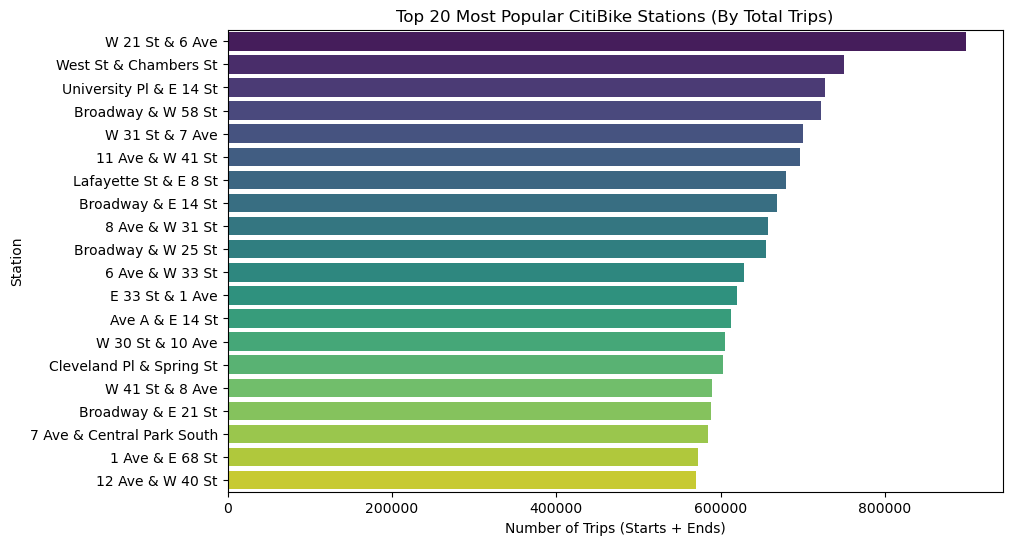

In [13]:
import duckdb
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../data/processed/citibike/*/*/data.parquet"

query = f"""
WITH starts AS (
    SELECT 
        start_station_name AS station,
        AVG(start_lat) AS lat,
        AVG(start_lng) AS lng,
        COUNT(*) AS n_starts
    FROM read_parquet('{DATA_PATH}')
    GROUP BY station
),
ends AS (
    SELECT 
        end_station_name AS station,
        AVG(end_lat) AS lat,
        AVG(end_lng) AS lng,
        COUNT(*) AS n_ends
    FROM read_parquet('{DATA_PATH}')
    GROUP BY station
)
SELECT
    COALESCE(s.station, e.station) AS station,
    COALESCE(s.lat, e.lat) AS lat,
    COALESCE(s.lng, e.lng) AS lng,
    COALESCE(n_starts, 0) AS starts,
    COALESCE(n_ends, 0) AS ends,
    COALESCE(n_starts, 0) + COALESCE(n_ends, 0) AS total_trips
FROM starts s
FULL OUTER JOIN ends e USING (station)
ORDER BY total_trips DESC
LIMIT 20
"""

df_top = duckdb.sql(query).df()
df_top

plt.figure(figsize=(10,6))
sns.barplot(data=df_top, x="total_trips", y="station", palette="viridis")
plt.title("Top 20 Most Popular CitiBike Stations (By Total Trips)")
plt.xlabel("Number of Trips (Starts + Ends)")
plt.ylabel("Station")
plt.show()
